In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data Turun.xlsx')
df

,t,Ta,Tb,T0,T1,T2,T3,T4,T5,T6,T7
0,1,37.75,78.11,51.56,57.04,55.75,39.64,36.42,37.71,36.09,33.19
1,2,37.75,77.91,51.56,57.04,55.43,39.64,36.42,37.71,36.09,33.19
2,3,38.00,77.91,51.56,57.04,55.75,39.32,36.42,37.38,35.77,33.19
3,4,38.50,77.70,51.56,57.04,55.75,39.64,36.42,37.38,35.77,33.19
4,5,38.00,77.91,51.24,56.72,55.43,39.64,36.09,37.71,35.77,33.19
...,...,...,...,...,...,...,...,...,...,...,...
1471,1472,27.75,28.23,26.10,28.04,28.04,27.71,28.04,27.71,27.39,27.39
1472,1473,27.75,28.43,26.10,27.71,28.04,27.71,28.04,27.71,27.39,27.39
1473,1474,27.75,28.43,26.10,27.71,28.04,27.71,28.04,27.71,27.71,27.71
1474,1475,27.75,27.82,26.10,27.71,28.36,27.71,28.04,28.04,27.71,27.39


In [3]:
# Bias
Bias = [2.566, 0.94, 0.604, 0.652, 0.428, 0.796, 0.988, 0.972]

# tambahkan bias sensor kedalam tiap data suhu
for i in range (0,8):
    df['T'+str(i)] = df['T'+str(i)] + Bias[i]

df

,t,Ta,Tb,T0,T1,T2,T3,T4,T5,T6,T7
0,1,37.75,78.11,54.126,57.98,56.354,40.292,36.848,38.506,37.078,34.162
1,2,37.75,77.91,54.126,57.98,56.034,40.292,36.848,38.506,37.078,34.162
2,3,38.00,77.91,54.126,57.98,56.354,39.972,36.848,38.176,36.758,34.162
3,4,38.50,77.70,54.126,57.98,56.354,40.292,36.848,38.176,36.758,34.162
4,5,38.00,77.91,53.806,57.66,56.034,40.292,36.518,38.506,36.758,34.162
...,...,...,...,...,...,...,...,...,...,...,...
1471,1472,27.75,28.23,28.666,28.98,28.644,28.362,28.468,28.506,28.378,28.362
1472,1473,27.75,28.43,28.666,28.65,28.644,28.362,28.468,28.506,28.378,28.362
1473,1474,27.75,28.43,28.666,28.65,28.644,28.362,28.468,28.506,28.698,28.682
1474,1475,27.75,27.82,28.666,28.65,28.964,28.362,28.468,28.836,28.698,28.362


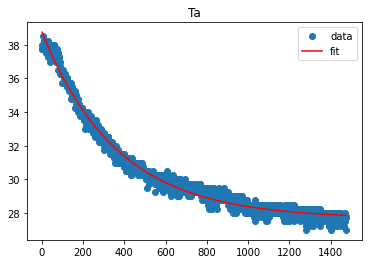

Parameter untuk Ta
k = 11.106225387975392
τ = 364.7734446044402
c = 27.6670313166716


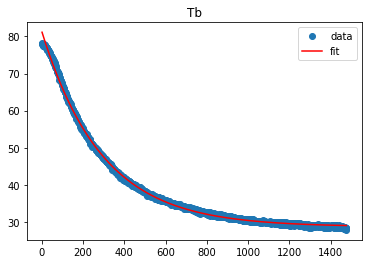

Parameter untuk Tb
k = 52.65292542555347
τ = 291.12635388481493
c = 28.666406803764126


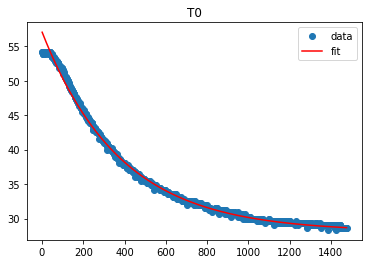

Parameter untuk T0
k = 29.02540617232598
τ = 378.55162250212857
c = 28.085982817004755


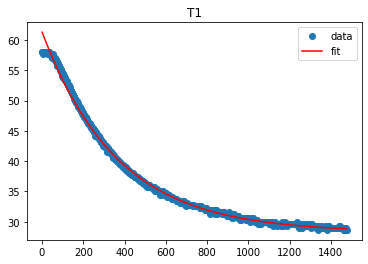

Parameter untuk T1
k = 33.112438488757086
τ = 364.1696673974244
c = 28.259324509714055


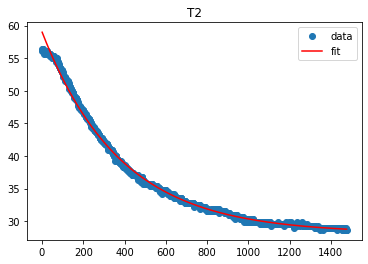

Parameter untuk T2
k = 30.92903196173195
τ = 378.0271296614572
c = 28.135316683409826


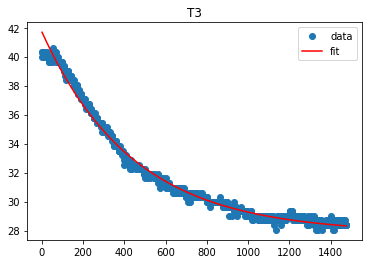

Parameter untuk T3
k = 13.88899797522148
τ = 441.20334614426116
c = 27.827588974668778


C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


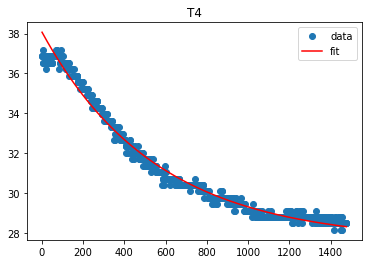

Parameter untuk T4
k = 10.509744050760712
τ = 552.2819353271107
c = 27.574706840976113


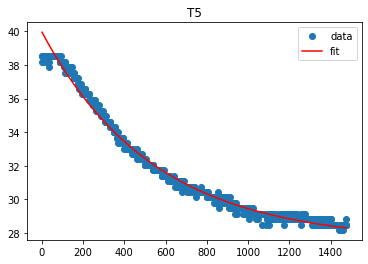

Parameter untuk T5
k = 12.480293756209253
τ = 540.4346084658715
c = 27.489814364769487


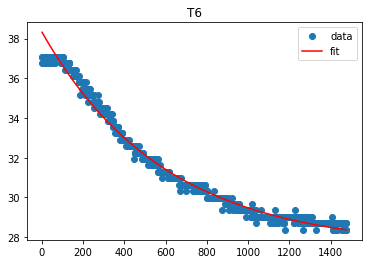

Parameter untuk T6
k = 10.87724307676202
τ = 591.6989642958514
c = 27.461404983767302


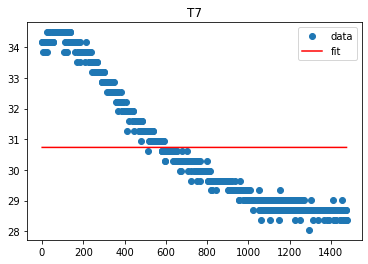

Parameter untuk T7
k = -1.1036221896032588
τ = 0.0010815704516727864
c = 30.733930894308948


In [4]:
# kurva untuk fitting

def f(t,k,τ,c):
    return k*(np.exp(-(t)/τ)) + c

# import curve fit module
from scipy.optimize import curve_fit

# fit all data 
for i in range (0,2):
    
        t = df['t']
        y = df['T'+chr(97+i)]
    
        # initial guess
        k = 0.1
        τ = 1
        td = 0.1
    
        # fit
        popt, pcov = curve_fit(f, t, y, p0=[k, τ, td], method='dogbox') # kurva difit dengan memvariasikan parameter k, τ, dan c
    
        # plot
        plt.plot(t, y, 'o', label='data')
        plt.plot(t, f(t, *popt), 'r-', label='fit')
        plt.legend()
        plt.title('T'+chr(97+i))
        plt.show()
    
        # print parameter
        print('Parameter untuk T'+chr(97+i))
        print('k =', popt[0])
        print('τ =', popt[1])
        print('c =', popt[2])

for i in range (0,8):

    t = df['t']
    y = df['T'+str(i)]

    # initial guess
    k = 0.1
    τ = 1
    td = 0.1

    # fit
    popt, pcov = curve_fit(f, t, y, p0=[k, τ, td], method='dogbox') # kurva difit dengan memvariasikan parameter k, τ, dan c

    # plot
    plt.plot(t, y, 'o', label='data')
    plt.plot(t, f(t, *popt), 'r-', label='fit')
    plt.legend()
    plt.title('T'+str(i))
    plt.show()

    # print parameter
    print('Parameter untuk T'+str(i))
    print('k =', popt[0])
    print('τ =', popt[1])
    print('c =', popt[2])


